In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
tf.random.set_seed(42)

TensorFlow 2.x selected.
2.1.0


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':"162CZefASHGeRruIcEZffa8AdHf7YP5K5"})
downloaded.GetContentFile('bank.csv')

In [5]:
import pandas as pd
bank_df= pd.read_csv('bank.csv', index_col= 'RowNumber')
bank_df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [6]:
bank_df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
bank_df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


EDA:-
1. There are 10,000 entries in the dataset
2. It has both Categorical and Numeric dataset
3. So its Manadatory to conver the dataset gender and geography
4. We have to drop Customer ID and Surname as there is no imapact of the dataset
5. There are no null or NA entires
6. Exited the target column

Q2
Drop the columns which are unique for all users like IDs 

In [0]:
bank_df =bank_df.drop(['CustomerId','Surname'],axis=1)

In [11]:
bank_df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
bank_df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
bank_df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bank_df['Geography_cat'] = encoder.fit_transform(bank_df['Geography'])
bank_df['Gender_cat'] = encoder.fit_transform(bank_df['Gender'])

In [15]:
bank_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_cat,Gender_cat
RowNumber,,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0


In [16]:
bank_df[bank_df['Balance']==0.0].count()

CreditScore        3617
Geography          3617
Gender             3617
Age                3617
Tenure             3617
Balance            3617
NumOfProducts      3617
HasCrCard          3617
IsActiveMember     3617
EstimatedSalary    3617
Exited             3617
Geography_cat      3617
Gender_cat         3617
dtype: int64

In [17]:
bank_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Q3 Distinguish the feature and target set

We will be dropping the Gender and Geography column because we have converted using Labelencoding. Hence dropping the original columns

In [0]:
X = bank_df.drop(['Exited','Gender','Geography'],axis=1) # Credit Score through Estimated Salary - features , Dropping Categorical values like Gender , Geography and dropping target column
y = bank_df['Exited'] # Exited target

In [19]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


Q4.Divide the data set into training and test sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8000, 10)
Number transactions y_train dataset:  (8000,)
Number transactions X_test dataset:  (2000, 10)
Number transactions y_test dataset:  (2000,)


Q5 Normalize the train and test data

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Q6 Initialize & build the model 

In [22]:

import keras
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(activation = 'relu', input_dim = 10, units=6, kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(activation = 'relu', units=6, kernel_initializer='uniform')) 
model.add(tf.keras.layers.Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform')) 

from keras import optimizers
sgd = tf.keras.optimizers.SGD(lr=0.03)

Using TensorFlow backend.


Q7

In [23]:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train,epochs=100, batch_size=5, verbose=2)

Train on 8000 samples
Epoch 1/100
8000/8000 - 2s - loss: 0.5179 - accuracy: 0.7945
Epoch 2/100
8000/8000 - 2s - loss: 0.5083 - accuracy: 0.7945
Epoch 3/100
8000/8000 - 2s - loss: 0.5081 - accuracy: 0.7945
Epoch 4/100
8000/8000 - 2s - loss: 0.5079 - accuracy: 0.7945
Epoch 5/100
8000/8000 - 2s - loss: 0.4936 - accuracy: 0.7945
Epoch 6/100
8000/8000 - 2s - loss: 0.4401 - accuracy: 0.7945
Epoch 7/100
8000/8000 - 2s - loss: 0.4145 - accuracy: 0.8163
Epoch 8/100
8000/8000 - 2s - loss: 0.3949 - accuracy: 0.8340
Epoch 9/100
8000/8000 - 2s - loss: 0.3872 - accuracy: 0.8378
Epoch 10/100
8000/8000 - 2s - loss: 0.3824 - accuracy: 0.8422
Epoch 11/100
8000/8000 - 2s - loss: 0.3784 - accuracy: 0.8431
Epoch 12/100
8000/8000 - 2s - loss: 0.3787 - accuracy: 0.8445
Epoch 13/100
8000/8000 - 2s - loss: 0.3765 - accuracy: 0.8462
Epoch 14/100
8000/8000 - 2s - loss: 0.3734 - accuracy: 0.8476
Epoch 15/100
8000/8000 - 2s - loss: 0.3704 - accuracy: 0.8469
Epoch 16/100
8000/8000 - 2s - loss: 0.3693 - accuracy: 0.

Q7. Predict the results using 0.5 as a threshold 

In [25]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
test_loss, test_acc = model.evaluate(x=X_test,y=y_test.values)
print("Accuracy: ",test_acc)
print("Loss: ",test_loss)

2000/2000 [==============================] - 0s 72us/sample - loss: 0.3435 - accuracy: 0.8590
Accuracy:  0.859
Loss:  0.3434857120513916


Q8 Print the Accuracy score and confusion matrix 


Confusion matrix:
 [[1555   52]
 [ 230  163]]


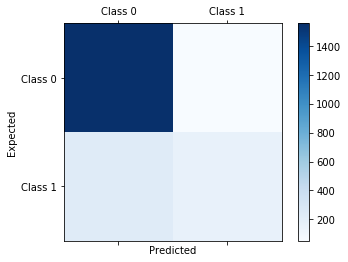

In [26]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

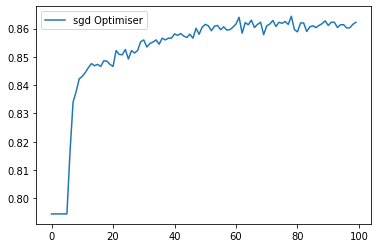

In [27]:
from matplotlib import pyplot
# plot metrics

pyplot.plot(history.history['accuracy'],label='sgd Optimiser')

pyplot.legend()

pyplot.show()

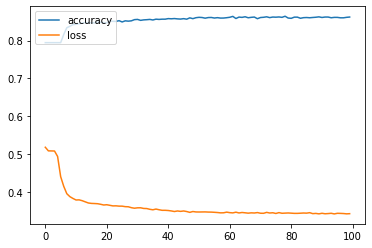

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()